## Query Study on Worldwide Earthquakes within past 24 hours
### Note: To get recent earthquakes -> Click Cell --> Run All!
### Note: Results are below the code!

#### Goal
The goal of this project is to extract all earthquakes that have occured all over the world in real time and analyze the data with queries utilizing SQLite.

#### Data
The earthquake data is pulled from the USGS (link below). The USGS provides earthquake data in various feeds: past hour, past 24 hours, past 7 days, past 30 days. This project uses the past 24 hour feed, which is in GeoJSON format. 

#### Method
I created a function (get_recent_earthquakes) that takes the past 24 hour earthquake GeoJSON data and creates a Dataframe using some key properties of the earthquakes. In this study, I am primarily working with location and magnitude of earthquakes. 

After cleaning the dataframe, I created another function that maps the data (plot quakes).

Lastly, I created a function (query_earthquakes) that takes an SQLite query as input and returns the result. 

### Note: Results are below the code!

Website for GeoJSON earthquake files!
https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import json
from geopy.geocoders import Nominatim   #convert an address into lat and log values
import requests  #libaray to handle requests
from pandas.io.json import json_normalize    #transfrom JSON file into a pandas dataframe

import folium
import pandasql as psql
from datetime import date

from IPython.display import HTML, display

print('libraries imported')

libraries imported


In [3]:
#This function takes the GeoJSON file of all earthquakes within past 24 hours and puts data into a dataframe
def get_recent_earthquakes(earthquakes):
    data = earthquakes
    
    jsonresults = requests.get(data).json()
    
    earthquake_data = jsonresults['features']
    
    columns = ['mag','place','time','url','felt','alert','sig','event_type','latitude','longitude','ID']
    global earthquake_df
    earthquake_df = pd.DataFrame(columns = columns)
    
    
    for data in earthquake_data:
        mag = data['properties']['mag']
        place = data['properties']['place']
        time = data['properties']['time']
        url = data['properties']['url']
        felt = data['properties']['felt']
        alert = data['properties']['alert']
        sig = data['properties']['sig']
        event_type = data['properties']['type']
        latitude = data['geometry']['coordinates'][1]
        longitude = data['geometry']['coordinates'][0]
    
    #put into df
    
        earthquake_df = earthquake_df.append({'mag':mag,
                   'place':place,
                   'time':time,
                   'url':url,
                   'felt':felt,
                   'alert':alert,
                   'sig':sig,
                   'event_type':event_type,
                   'latitude':latitude,
                   'longitude':longitude},ignore_index = True)
    earthquake_df['place'] = earthquake_df['place'].str.split('of').str[1]
    earthquake_df['location'] = earthquake_df['place'].str.split(',').str[1]
    earthquake_df['location'] = earthquake_df['location'].str.replace('CA','California')
    earthquake_df['class'] = ['Minor' if x >-1 and x<4 else 
                           'Light' if x>=4 and x<5 else 
                           'Moderate' if x>=5 and x<6 else 
                           'Strong' if x>=6 and x<7 else
                           'Major' if x>=7 and x<8 else
                           'Great' for x in earthquake_df['mag']]
    #print('Within the past day, there have been {} earthquakes worldwide'.format(earthquake_df.shape[0]))
    print("Today's date:", date.today())
    return earthquake_df.head(10)
    

In [4]:
#This function plots all earthquakes within past 24 hours
def plot_quakes():
    lat = 48.049439
    long =-2.974767
    world_map = folium.Map(location = [lat,long],zoom_start = 2)
    
    # instantiate a feature group for the incidents in the dataframe
    #incidents = folium.map.FeatureGroup()

    # loop through df and add each to the incidents feature group
    for lat, lng, mag in zip(earthquake_dfs.latitude, earthquake_dfs.longitude,earthquake_dfs.mag):
        folium.Marker(location = [lat, lng],popup = str(mag),icon = folium.Icon(color = color(mag))).add_to(world_map)
                
        

    # add incidents to map and show
    display(world_map)

In [5]:
#This function takes a SQLite query and returns the results
def query_earthquakes(query):
    #refine earthquake dataframe
    global earthquake_dfs
    earthquake_dfs = earthquake_df.drop(columns = ['time','url','felt','alert','sig','event_type','ID'])
    earthquake_dfs['place'] = earthquake_df['place'].astype(str)
    earthquake_dfs['location'] = earthquake_dfs['location'].astype(str)
    #print query
    print(psql.sqldf(query,globals()))
    

In [6]:
#this function is to control the marker colors on the map so that the hotter colors are higher in magnitude
def color(mag):
    if mag in np.arange(0,1.0,0.01).round(decimals= 2):
        col = 'darkpurple'
    #elif mag in np.arange(0,1.0,0.1).round(decimals= 1):
        #col = 'purple'
    elif mag in np.arange(1,2.0,0.01).round(decimals= 2):
        col = 'blue'
   # elif mag in np.arange(1,2.0,0.1).round(decimals= 1):
       # col = 'blue'    
    elif mag in np.arange(2,3.0,0.01).round(decimals= 2):
        col = 'lightblue'
    #elif mag in np.arange(2,3.0,0.1).round(decimals= 1):
        #col = 'light blue'    
    elif mag in np.arange(3,4.0,0.01).round(decimals= 2):
        col = 'lightgreen'
    #elif mag in np.arange(3,4.0,0.1).round(decimals= 1):
        #col = 'light green'    
    elif mag in np.arange(4,5.0,0.01).round(decimals= 2):
        col = 'orange'
    #elif mag in np.arange(4,5.0,0.1).round(decimals= 1):
       # col = 'yellow'
    elif mag in np.arange(5,6.0,0.01).round(decimals= 2):
        col = 'lightred'
    #elif mag in np.arange(5,6.0,0.1).round(decimals= 1):
       # col = 'orange'
    else:
        col = 'red'    
    return col

----

### Run function to look at the 10 most recent earthquakes

In [7]:
get_recent_earthquakes('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson')

Today's date: 2020-01-13


,mag,place,time,url,felt,alert,sig,event_type,latitude,longitude,ID,location,class
0,0.60,"Little Lake, CA",1578928892720,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,6,earthquake,35.894667,-117.679500,NaN,California,Minor
1,2.20,"Kobuk, Alaska",1578928474058,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,74,earthquake,66.256300,-157.667300,NaN,Alaska,Minor
2,3.30,"Palomas, Puerto Rico",1578928227710,https://earthquake.usgs.gov/earthquakes/eventp...,2,None,168,earthquake,17.923500,-66.840100,NaN,Puerto Rico,Minor
3,2.23,"The Geysers, CA",1578927773150,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,77,earthquake,38.783333,-122.724670,NaN,California,Minor
4,2.51,"Pahala, Hawaii",1578927513210,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,97,earthquake,19.160667,-155.472839,NaN,Hawaii,Minor
5,1.42,"Searles Valley, CA",1578927220180,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,31,earthquake,36.039667,-117.403333,NaN,California,Minor
6,1.65,"Ridgecrest, CA",1578926047290,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,42,earthquake,35.654667,-117.533833,NaN,California,Minor
7,1.60,"Cantwell, Alaska",1578925286634,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,39,earthquake,62.890000,-149.665100,NaN,Alaska,Minor
8,0.91,"Searles Valley, CA",1578924734270,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,13,earthquake,35.658167,-117.464500,NaN,California,Minor
9,1.60,"Cantwell, Alaska",1578924721737,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,39,earthquake,63.258000,-151.328700,NaN,Alaska,Minor


---

# Queries of Earthquakes within past 24 hours

###  #1. How many earthquakes have there been around the world within the past 24 hours?

In [8]:
query_earthquakes("SELECT count(*) as Earthquakes_Last24Hours from earthquake_dfs")

   Earthquakes_Last24Hours
0                      202


---

###  #2. What location had the most recent earthquake and what was the earthquakes magnitude?

In [9]:
query_earthquakes("SELECT place,mag as Magnitude FROM earthquake_dfs LIMIT 1;")

              place  Magnitude
0   Little Lake, CA        0.6


---

###  #3. Top 5 locations with most earthquakes in past 24 hours

In [10]:
query_earthquakes("SELECT location,count(place) as Total_Quakes FROM earthquake_dfs GROUP BY location ORDER BY count(location) DESC LIMIT 5")

       location  Total_Quakes
0    California            99
1        Alaska            38
2   Puerto Rico            23
3        Hawaii            15
4      Oklahoma             9


---

###  #4. All earthquakes that occured in Hawaii past 24 hours

In [11]:
query_earthquakes("SELECT place,mag as magnitude,latitude,longitude FROM earthquake_dfs WHERE location LIKE '%Hawaii%'")

               place  magnitude   latitude   longitude
0     Pahala, Hawaii       2.51  19.160667 -155.472839
1     Pahala, Hawaii       2.30  19.156000 -155.479828
2     Pahala, Hawaii       2.01  19.299334 -155.356827
3    Volcano, Hawaii       1.99  19.400833 -155.289673
4     Pahala, Hawaii       2.06  19.192333 -155.436661
5     Pahala, Hawaii       2.34  19.250166 -155.384506
6    Volcano, Hawaii       2.42  19.410000 -155.289993
7    Volcano, Hawaii       2.52  19.413000 -155.297333
8    Volcano, Hawaii       2.41  19.412666 -155.288834
9    Volcano, Hawaii       1.90  19.401501 -155.266998
10    Pahala, Hawaii       1.88  19.210333 -155.404831
11   Volcano, Hawaii       2.14  19.418501 -155.284164
12    Pahala, Hawaii       1.88  19.201000 -155.409500
13    Pahala, Hawaii       2.00  19.221500 -155.423660
14   Volcano, Hawaii       1.94  19.416166 -155.275665


---

###  #5. Compute average magnitude and total count for each location that had an earthquake

In [12]:
query_earthquakes("SELECT location, avg(mag) as Avg_Magnitude,count(location) as Total_Quakes FROM earthquake_dfs GROUP BY location ORDER BY count(location) DESC")

             location  Avg_Magnitude  Total_Quakes
0          California       1.212020            99
1              Alaska       2.147368            38
2         Puerto Rico       3.238261            23
3              Hawaii       2.153333            15
4            Oklahoma       1.827778             9
5              Nevada       0.750000             2
6    Papua New Guinea       4.650000             2
7           Argentina       5.300000             1
8                B.C.       2.090000             1
9              Canada       3.280000             1
10              Chile       4.800000             1
11            Ecuador       4.600000             1
12               Fiji       4.800000             1
13             Mexico       4.100000             1
14              Nepal       4.300000             1
15        New Zealand       4.900000             1
16             Poland       4.200000             1
17    Solomon Islands       5.200000             1
18          Tennessee       1.4

###  #6. Compute percentage of earthquakes that occured in California

In [13]:
q3 = """SELECT location,
round(count(case when location LIKE '%California%' then 1 end)*1.0 / count(*),2)*100 as 'percentage(%)' FROM earthquake_dfs
"""

query_earthquakes(q3)

      location  percentage(%)
0   California           49.0


---

###  #7. Location with at least 5 earthquakes with average and maximum magnitudes

In [14]:
query_earthquakes("SELECT location,count(place) as Total_Quakes, avg(mag) as Average_Magnitude,max(mag) as Maximum_Magnitude FROM earthquake_dfs GROUP BY location HAVING count(place) >4.999")

       location  Total_Quakes  Average_Magnitude  Maximum_Magnitude
0        Alaska            38           2.147368               5.00
1    California            99           1.212020               3.25
2        Hawaii            15           2.153333               2.52
3      Oklahoma             9           1.827778               2.31
4   Puerto Rico            23           3.238261               4.50


---

Let's look at the earthquake magnitude classes according to Michigan Tech University (http://www.geo.mtu.edu/UPSeis/magnitude.html)

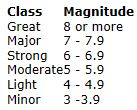

###  #8. Were there any locations that had a 'Strong' earthquake? If so, how many and what places?

In [15]:
query_earthquakes("SELECT place,mag as Magnitude FROM earthquake_dfs WHERE mag > 5.999")

                  

Empty DataFrame
Columns: [place, Magnitude]
Index: []


---

###  #9. Count of earthquake class per location

In [16]:
q = """SELECT location, 
sum(case when class = 'Minor' then 1 else 0 end) Minor,
sum(case when class = 'Light' then 1 else 0 end) Light,
sum(case when class = 'Moderate' then 1 else 0 end) Moderate,
sum(case when class = 'Strong' then 1 else 0 end) Strong,
sum(case when class = 'Major' then 1 else 0 end) Major,
sum(case when class = 'Great' then 1 else 0 end) Great
FROM earthquake_dfs GROUP BY location
"""
query_earthquakes(q)

             location  Minor  Light  Moderate  Strong  Major  Great
0              Alaska     34      3         1       0      0      0
1           Argentina      0      0         1       0      0      0
2                B.C.      1      0         0       0      0      0
3          California     99      0         0       0      0      0
4              Canada      1      0         0       0      0      0
5               Chile      0      1         0       0      0      0
6             Ecuador      0      1         0       0      0      0
7                Fiji      0      1         0       0      0      0
8              Hawaii     15      0         0       0      0      0
9              Mexico      0      1         0       0      0      0
10              Nepal      0      1         0       0      0      0
11             Nevada      2      0         0       0      0      0
12        New Zealand      0      1         0       0      0      0
13           Oklahoma      9      0         0   

---

###  #10. All Earthquakes Per Class

In [17]:
query_earthquakes("SELECT class, count(class) FROM earthquake_dfs GROUP BY class")

      class  count(class)
0     Light            16
1     Minor           183
2  Moderate             3


---

### Run function to plot earthquakes
**Color Scale:**

0-1 Magnitude: Dark Purple 

1-2 Magnitude: Blue

2-3 Magnitude: Light Blue

3-4 Magnitude: Light Green

4-5 Magnitude: Orange

5-6 Magnitude: Light Red

6+ Magnitude: Red

In [18]:
plot_quakes()